In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Steady Plane Poiseuille Flow


The Navier Stokes equation obtained using Conservation of momentum can be written for horizontal components as below

$$
\rho\left(\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x}+v \frac{\partial u}{\partial y}\right)=-\frac{\partial p}{\partial x}+\mu\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)
$$

No vertical motion of fluid is assumed

$$
v=0 
$$

At steady state the velocity profile obtains a form that doesn't vary with time thus time derivatives are equal to zero and 
The horizontal velocity is assumed to have same value throught for all values of x for a particular y at steady state which implies gradient of u w.r.t. x is 0.
Thus,

$$
\frac{\partial u}{\partial t}=0, \frac{\partial u}{\partial x}=0, v \frac{\partial u}{\partial y}=0, \frac{\partial^{2} u}{\partial x^{2}}=0
$$

Thus at steady state,

$$
\frac{\partial p}{\partial x}=\mu\left(\frac{\partial^{2} u}{\partial y^{2}}\right)
$$


In [2]:
def solver(pressure_on_right_boundary, pressure_on_left_boundary, height, length, Ny, viscosity):
    dy = height/Ny
    pressure_gradient = (pressure_on_right_boundary-pressure_on_left_boundary)/length
    const = (dy**2)/viscosity
    vector = np.concatenate(([0], [const*pressure_gradient]*(Ny - 2), [0]))
    matrix = np.zeros(shape=(Ny,Ny))
    matrix[0,0] = 1
    matrix[-1,-1] = 1
    for i in range(1,Ny-1):
        matrix[i,i-1] = 1
        matrix[i,i] = -2
        matrix[i,i+1] = 1
    U=np.matmul(np.linalg.inv(matrix),vector)
    return U

In [3]:
mu=5                #viscosity
Pl=500                #Pressure on the left boundary
Pr=200                #Pressure on the right boundary
L=40                #Horizontal length 
press_grad=(Pr-Pl)/L        #Pressure gradient
H=15                 #Vertical height
Nysteps = 1000

In [4]:
u = solver(Pr,Pl,H,L,Nysteps,mu)
y = np.linspace(0,H,Nysteps)
analytical_solution = -press_grad/(2*mu)*y*(H-y)

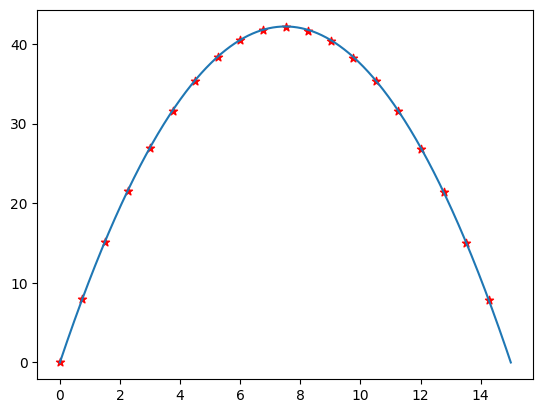

In [5]:
visualize_frequency=50
plt.scatter(y[::visualize_frequency],u[::visualize_frequency],marker='*',c='red')
plt.plot(y,analytical_solution)

C:\Users\ФИС\AppData\Local\Temp\ipykernel_13756\2650826894.py:1: RuntimeWarning: invalid value encountered in divide
  plt.scatter(y[::visualize_frequency],((u-analytical_solution)/analytical_solution*100)[::visualize_frequency],marker='*',c='red')


Text(0.5, 1.0, 'difference')

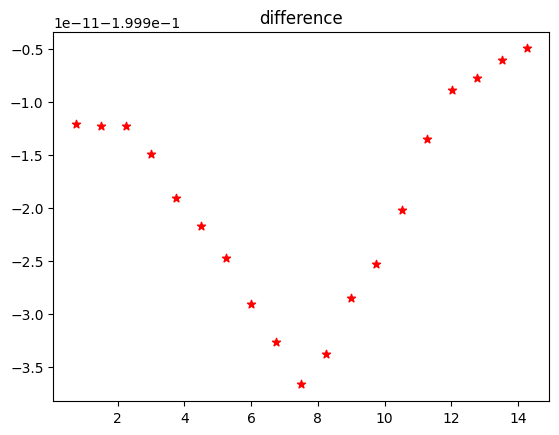

In [6]:
plt.scatter(y[::visualize_frequency],((u-analytical_solution)/analytical_solution*100)[::visualize_frequency],marker='*',c='red')
plt.title('difference')

In [7]:
%%timeit
solver(Pr,Pl,H,L,Nysteps,mu)

255 ms ± 24.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
